# 1. Import the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

# 2. Load the data

In [2]:
df = pd.read_csv('Data1.csv')
df.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [3]:
df.shape

(683, 11)

In [4]:
# Checking for missing values
df.isnull().sum()

Sample code number             0
Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

In [5]:
duplicates = df[df.duplicated()]
print('Number of dublicates:', len(duplicates))
duplicates

Number of dublicates: 8


,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
202,1218860,1,1,1,1,1,1,3,1,1,2
245,1100524,6,10,10,2,8,10,7,3,3,4
246,1116116,9,10,10,1,10,8,3,3,1,4
250,1198641,3,1,1,1,2,1,3,1,1,2
264,320675,3,3,5,2,3,10,7,1,1,4
324,704097,1,1,1,1,1,1,2,1,1,2
546,1321942,5,1,1,1,2,1,3,1,1,2
668,466906,1,1,1,1,2,1,1,1,1,2


In [6]:
# Drop duplicates
df = df.drop_duplicates()
df.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [7]:
relevant_features = ['Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape', 'Marginal Adhesion',
                    'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin', 'Normal Nucleoli', 'Mitoses']

In [8]:
df.shape

(675, 11)

In [9]:
df.describe()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,6.750000e+02,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000
mean,1.078448e+06,4.451852,3.146667,3.208889,2.848889,3.229630,3.537778,3.442963,2.885926,1.607407,2.699259
std,6.229108e+05,2.820859,3.055005,2.976552,2.875917,2.208497,3.637871,2.453894,3.065607,1.741006,0.954413
min,6.337500e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.781505e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171845e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238777e+06,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [10]:
# Checking for the unique values
df.nunique()

Sample code number             630
Clump Thickness                 10
Uniformity of Cell Size         10
Uniformity of Cell Shape        10
Marginal Adhesion               10
Single Epithelial Cell Size     10
Bare Nuclei                     10
Bland Chromatin                 10
Normal Nucleoli                 10
Mitoses                          9
Class                            2
dtype: int64

In [11]:
df['Class'].value_counts()

2    439
4    236
Name: Class, dtype: int64

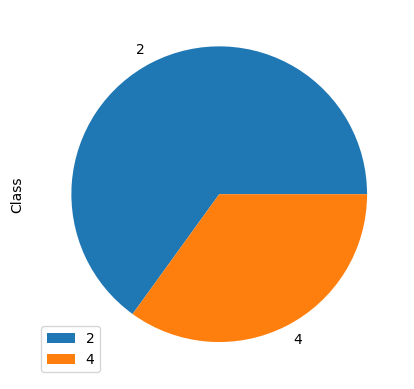

In [12]:
df['Class'].value_counts().plot(kind='pie')
plt.legend()

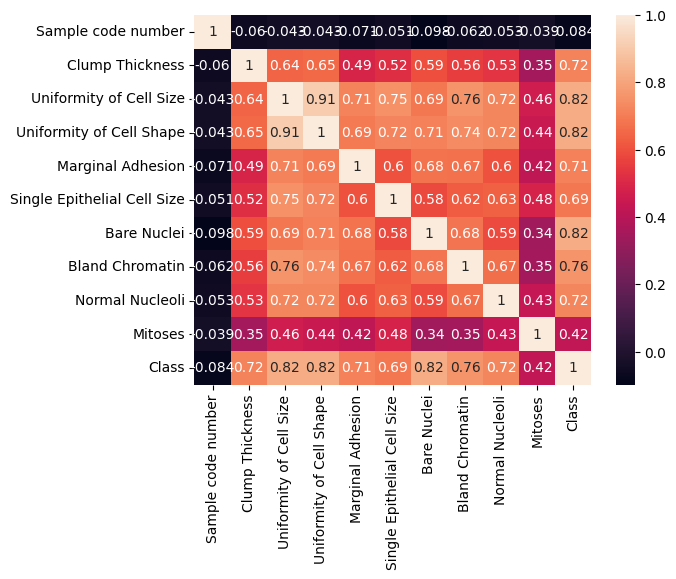

In [13]:
df_corr = df.corr()
sns.heatmap(df_corr, annot=True)
plt.show()

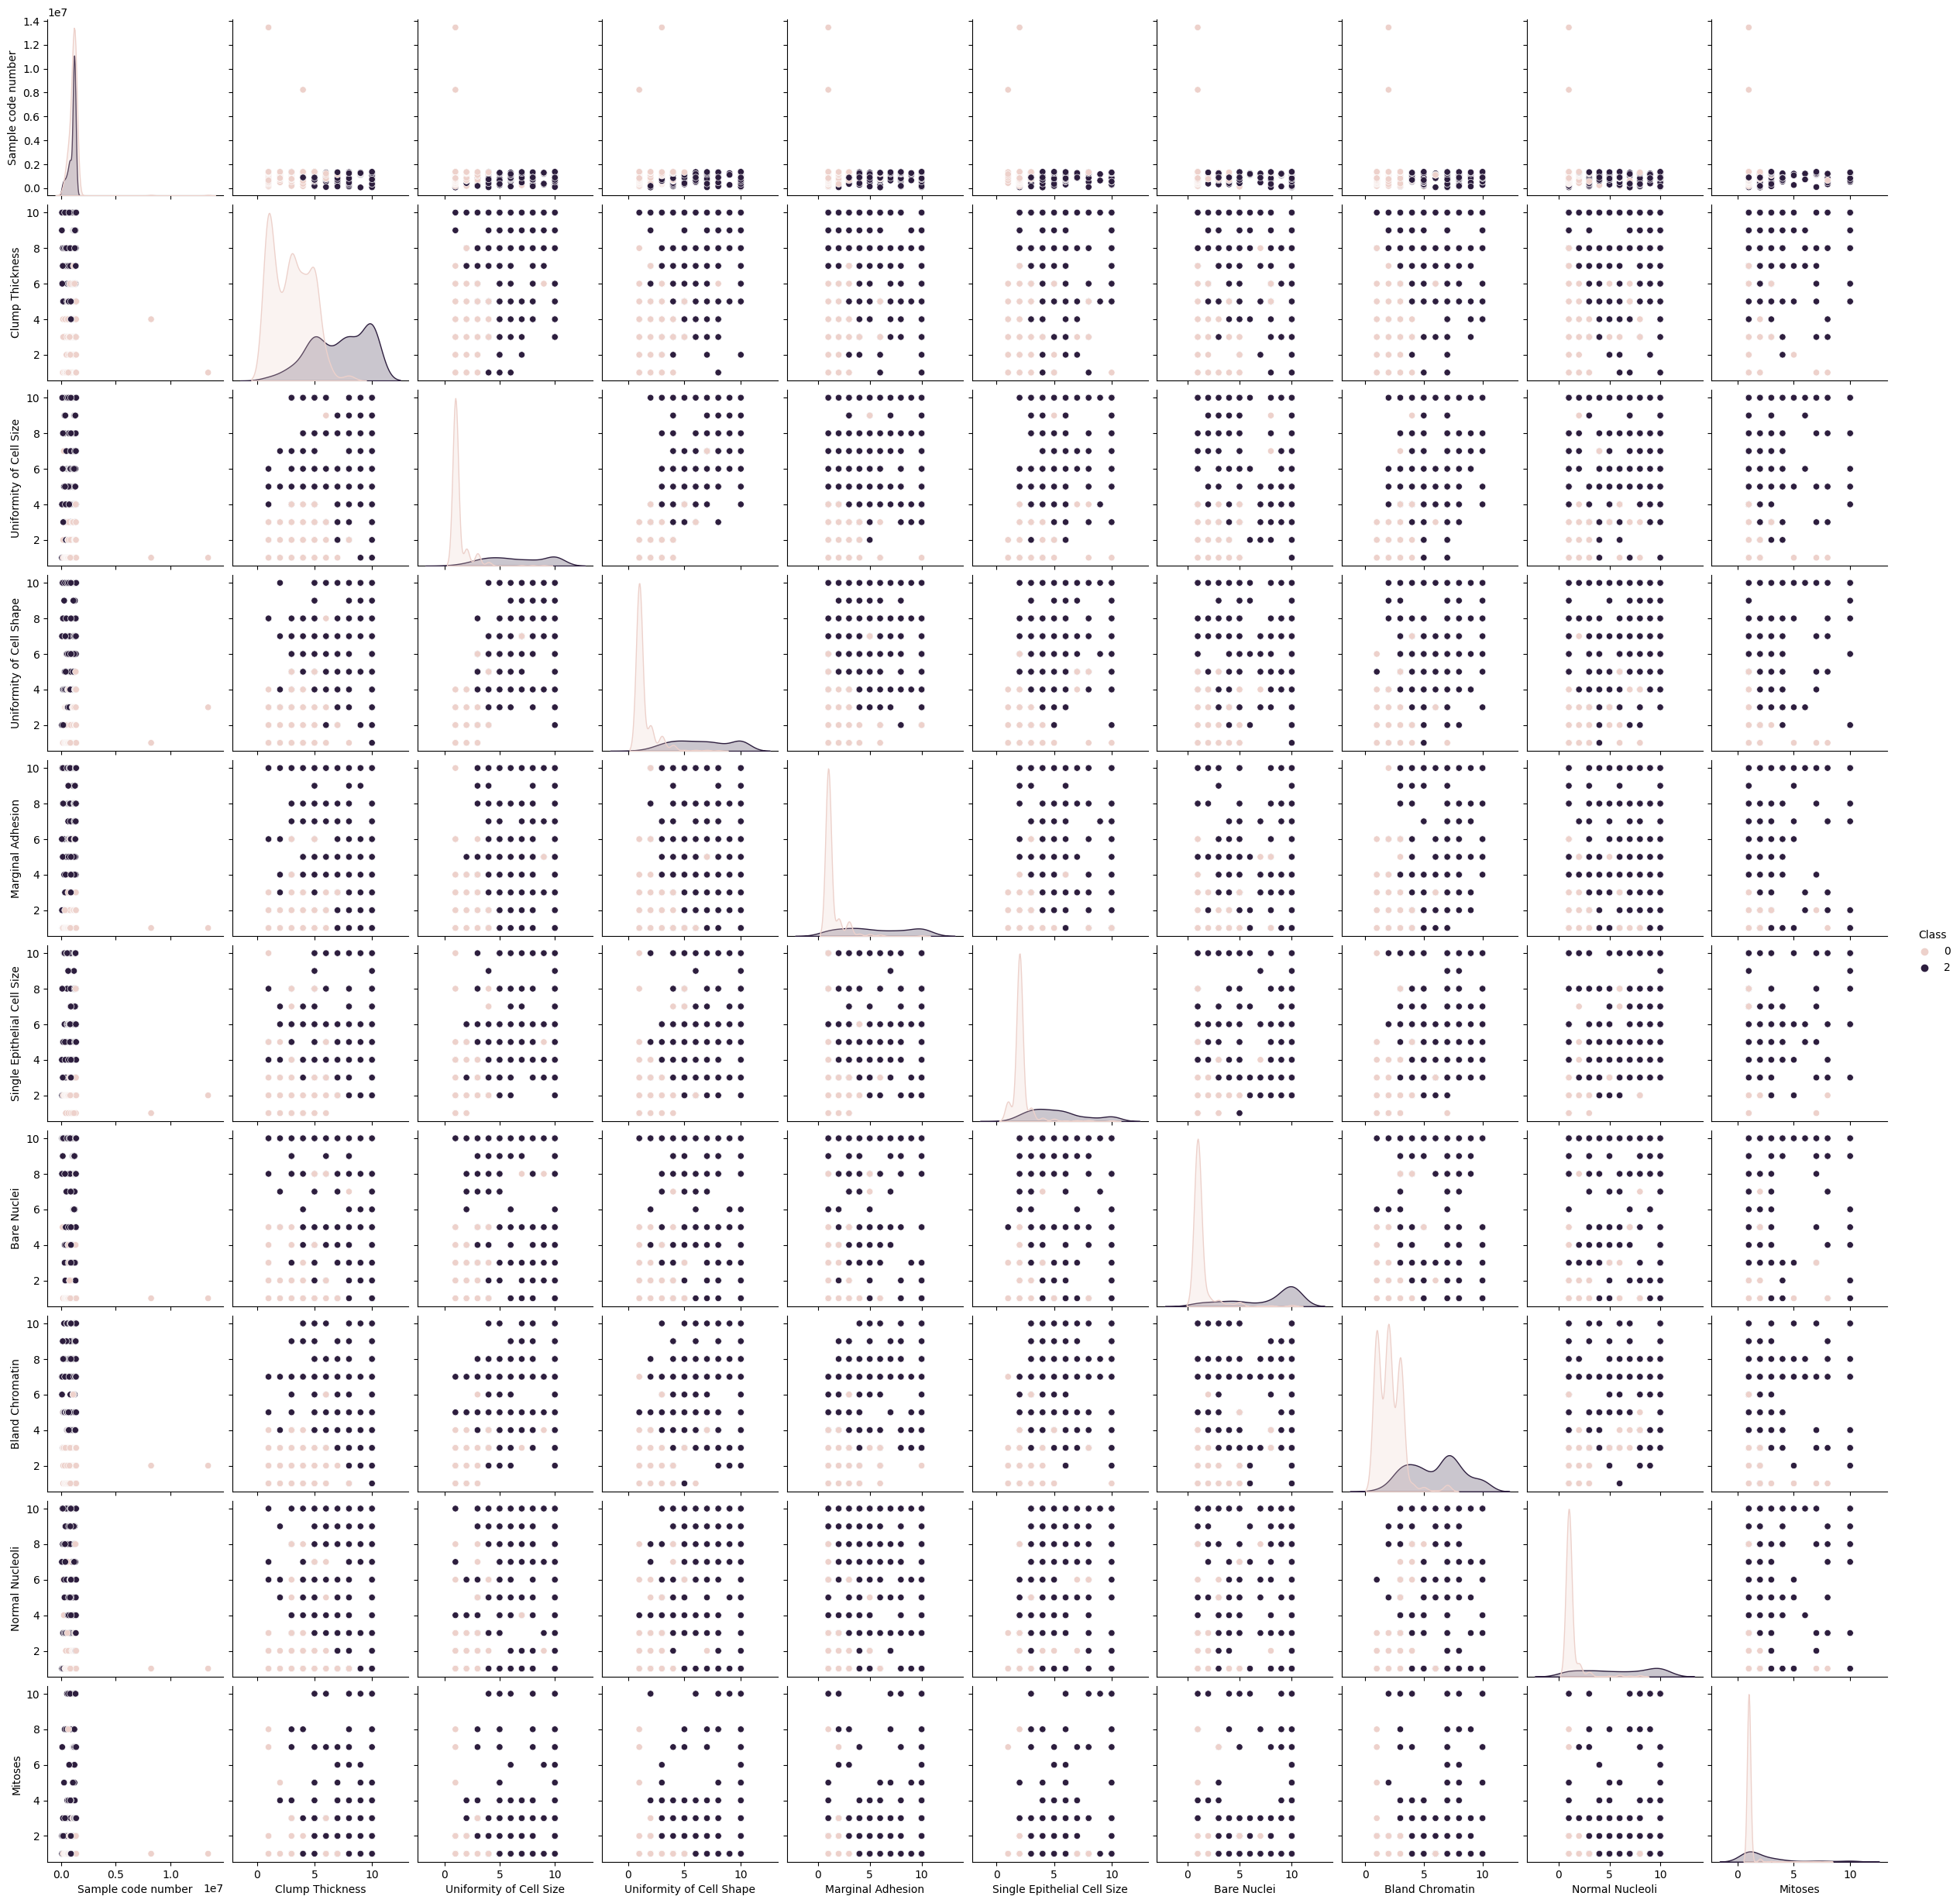

In [38]:
sns.pairplot(df, hue='Class')
plt.show()

In [14]:
X = df.drop(['Sample code number', 'Class'], axis='columns')
X.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
0,5,1,1,1,2,1,3,1,1
1,5,4,4,5,7,10,3,2,1
2,3,1,1,1,2,2,3,1,1
3,6,8,8,1,3,4,3,7,1
4,4,1,1,3,2,1,3,1,1


In [15]:
df['Class'] = df['Class'].apply(lambda x : 0 if x==2 else 2)
df['Class'].head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

In [16]:
y = df['Class']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

# 3. Perform feature scaling

In [17]:
model_scaler = MinMaxScaler(feature_range=(0, 1))
X[relevant_features] = model_scaler.fit_transform(X[relevant_features])
X

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
0,0.444444,0.000000,0.000000,0.000000,0.111111,0.000000,0.222222,0.000000,0.000000
1,0.444444,0.333333,0.333333,0.444444,0.666667,1.000000,0.222222,0.111111,0.000000
2,0.222222,0.000000,0.000000,0.000000,0.111111,0.111111,0.222222,0.000000,0.000000
3,0.555556,0.777778,0.777778,0.000000,0.222222,0.333333,0.222222,0.666667,0.000000
4,0.333333,0.000000,0.000000,0.222222,0.111111,0.000000,0.222222,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...
678,0.222222,0.000000,0.000000,0.000000,0.222222,0.111111,0.000000,0.000000,0.000000
679,0.111111,0.000000,0.000000,0.000000,0.111111,0.000000,0.000000,0.000000,0.000000
680,0.444444,1.000000,1.000000,0.222222,0.666667,0.222222,0.777778,1.000000,0.111111
681,0.333333,0.777778,0.555556,0.333333,0.222222,0.333333,1.000000,0.555556,0.000000


# 4. Split Data

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [19]:
len(X_train)

540

In [20]:
len(X_test)

135

# 5. Train Models and Predict

In [21]:
predict = []

In [22]:
# Logistic Regrission
model_lg = LogisticRegression()
model_lg.fit(X_train, y_train)
y_predict_lg = model_lg.predict(X_test)

In [23]:
# Decision Tree Classifier
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train, y_train)
y_predict_dt = model_dt.predict(X_test)

In [24]:
# Random Forest Classifier
model_rf = RandomForestClassifier(n_estimators = 10)
model_rf.fit(X_train, y_train)
y_predict_rf = model_rf.predict(X_test)

In [25]:
# KNeighborsClassifier
model_knn = KNeighborsClassifier()
model_knn.fit(X_train, y_train)
y_predict_knn = model_knn.predict(X_test)

In [26]:
# Naive Bayes
model_nb = BernoulliNB()
model_nb.fit(X_train, y_train)
y_predict_nb = model_nb.predict(X_test)

In [27]:
# Support Vector Machine
model_svc = SVC()
model_svc.fit(X_train, y_train)
y_predict_svc = model_svc.predict(X_test)

In [28]:
matrix = {'LogisticRegression':y_predict_lg, 'DecisionTreeClassifier':y_predict_dt,
            'RandomForestClassifier': y_predict_rf, 'KNeighborsClassifier':y_predict_knn,
             'NaiveBayes':y_predict_nb, 'SupportVectorMachine':y_predict_svc}
y_predict = pd.DataFrame(data=matrix)
y_predict['y_test'] = y_test.values
y_predict

,LogisticRegression,DecisionTreeClassifier,RandomForestClassifier,KNeighborsClassifier,NaiveBayes,SupportVectorMachine,y_test
0,0,0,0,0,0,0,0
1,2,2,2,2,2,2,2
2,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0
4,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...
130,0,0,2,0,2,2,2
131,2,2,2,2,2,2,2
132,0,0,0,0,0,0,0
133,0,0,0,0,0,0,0


# 6. Confusion Matrix and Accuracy Score

In [29]:
def get_score(y_predict, y_test):
    
    conf_matrix = confusion_matrix(y_predict, y_test)
    print('Accuranccy = ', accuracy_score(y_predict, y_test))
    print('Confusion Matrix:\n{}\n'.format(conf_matrix))

In [30]:
for key in matrix:
    print('-------------------------------------')
    print("{}\n".format(key))
    get_score(matrix.get(key), y_test)

-------------------------------------
LogisticRegression

Accuranccy =  0.9481481481481482
Confusion Matrix:
[[83  6]
 [ 1 45]]

-------------------------------------
DecisionTreeClassifier

Accuranccy =  0.9703703703703703
Confusion Matrix:
[[83  3]
 [ 1 48]]

-------------------------------------
RandomForestClassifier

Accuranccy =  0.9703703703703703
Confusion Matrix:
[[83  3]
 [ 1 48]]

-------------------------------------
KNeighborsClassifier

Accuranccy =  0.9703703703703703
Confusion Matrix:
[[83  3]
 [ 1 48]]

-------------------------------------
NaiveBayes

Accuranccy =  0.9555555555555556
Confusion Matrix:
[[80  2]
 [ 4 49]]

-------------------------------------
SupportVectorMachine

Accuranccy =  0.9703703703703703
Confusion Matrix:
[[83  3]
 [ 1 48]]



# 7. KFold

In [31]:
def get_kfold_score(model, X, y, cv):
    scores = cross_val_score(model, X, y, cv=cv)
    print('\n{}'.format(scores))
    print('\nMean Accuracy: %.3f\nStandard Diviation: %.3f\n' % (np.mean(scores), np.std(scores)))

In [32]:
models = [model_lg, model_dt, model_rf, model_knn, model_nb, model_svc]

In [33]:
for model in models:
    print('-----------------------------------------------')
    print('{}:'.format(model))
    get_kfold_score(model, X, y, cv=10)

-----------------------------------------------
LogisticRegression():

[0.92647059 0.91176471 0.97058824 0.92647059 0.98529412 0.97014925
 0.97014925 0.98507463 0.98507463 1.        ]

Mean Accuracy: 0.963
Standard Diviation: 0.029

-----------------------------------------------
DecisionTreeClassifier():

[0.95588235 0.89705882 0.95588235 0.92647059 0.95588235 0.92537313
 0.95522388 0.97014925 0.92537313 0.97014925]

Mean Accuracy: 0.944
Standard Diviation: 0.023

-----------------------------------------------
RandomForestClassifier(n_estimators=10):

[0.89705882 0.95588235 0.95588235 0.92647059 0.98529412 0.92537313
 0.97014925 0.98507463 0.98507463 1.        ]

Mean Accuracy: 0.959
Standard Diviation: 0.031

-----------------------------------------------
KNeighborsClassifier():

[0.91176471 0.98529412 0.97058824 0.92647059 1.         0.97014925
 0.98507463 1.         0.98507463 0.97014925]

Mean Accuracy: 0.970
Standard Diviation: 0.028

-------------------------------------------

# 8.

**`` For each model compare the accuracy scores computed using cross-validation in
(7) versus when using only one test set in (6). Are the mean accuracy scores from
cross-validation higher or lower in comparison to the corresponding scores in (6)?
Did you expect them to be higher or lower? Why? ``**

I split the data with a train_test_split and cross validation. The results of these two methods are different. In all models, the accuracy decreased on the validation method. I expected this result because in cross-validation, we make a fixed number of folds (or partitions) of the data, run the analysis on each fold, and then average the overall error estimate. Therefore, when averaging, the accuracy decreases.

# 9. 

**``Choose the best performing model based on the results from performing the k-
fold cross-validation. Comment on your choice.``**


By comparing the outputs of the 6 models I can conclude that the SVM and KNeighborsClassifier have a slightly higher probability of giving a better prediction in terms of accuracy. Their accuracy is 97.00 %

# 10.

# C hyperparameter

The Regularization parameter (often termed as C parameter in python’s sklearn library) tells the SVM optimization how much you want to avoid misclassifying each training example.

For large values of C, the optimization will choose a smaller-margin hyperplane if that hyperplane does a better job of getting all the training points classified correctly. Conversely, a very small value of C will cause the optimizer to look for a larger-margin separating hyperplane, even if that hyperplane misclassifies more points.

I think it will be a value of 1 for parameter C. Since the correlation between points is very low and the classes do not have a clear separation boundary.

# 11.

In [34]:
from sklearn.model_selection import GridSearchCV

In [35]:
model_params = {
    'LogisticRegression' : {
        'model': LogisticRegression(solver='liblinear', multi_class='auto'),
        'params': {
            'C': [1, 5,10],
        }
    },
    'DecisionTreeClassifier' : {
        'model': DecisionTreeClassifier(),
        'params': {
            'criterion': ['gini', 'entropy'],
            'max_depth': [1, 4, 6, 8, 10],
        }
    },
    'RandomForestClassifier': {
        'model': RandomForestClassifier(n_estimators=10),
        'params': {
            'criterion': ['gini', 'entropy'],
            'n_estimators': [5, 10, 20, 40],
            'max_depth': [2, 4, 6, 10],
            'max_leaf_nodes': [2, 4, 6, 8, 10]
        }
    },
    'KNeighborsClassifier': {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [2, 4, 6, 8],
            'weights': ['uniform', 'distance'],
            'leaf_size': [10, 30, 60]
        }
    },
    'BernoulliNB': {
      'model': BernoulliNB(),
      'params': {
          
        }
    },
    'SVM': {
        'model': SVC(),
        'params': {
            'C': [1,10,20],
            'kernel': ['rbf','linear']
        }
    },
}

In [36]:
scores = []

for model_name, mp in model_params.items():
    clf = GridSearchCV(mp['model'], mp['params'], cv=5, scoring='accuracy')
    clf.fit(X, y)
    scores.append({
        'model' : model_name,
        'best_score' : clf.best_score_,
        'best_params' : clf.best_params_
    })
df_hyper_param = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df_hyper_param

,model,best_score,best_params
0,LogisticRegression,0.962963,{'C': 1}
1,DecisionTreeClassifier,0.948148,"{'criterion': 'entropy', 'max_depth': 4}"
2,RandomForestClassifier,0.973333,"{'criterion': 'gini', 'max_depth': 10, 'max_le..."
3,KNeighborsClassifier,0.965926,"{'leaf_size': 10, 'n_neighbors': 8, 'weights':..."
4,BernoulliNB,0.942222,{}
5,SVM,0.968889,"{'C': 1, 'kernel': 'linear'}"
